In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importer la donnée

In [3]:
df = pd.read_csv('data/PS_20174392719_1491204439457_log.csv')

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.shape

(6362620, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df.isnull().sum().any()

False

In [9]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [10]:
(df['isFraud'].value_counts() / len(df)) * 100

isFraud
0    99.870918
1     0.129082
Name: count, dtype: float64

<Axes: xlabel='isFraud', ylabel='count'>

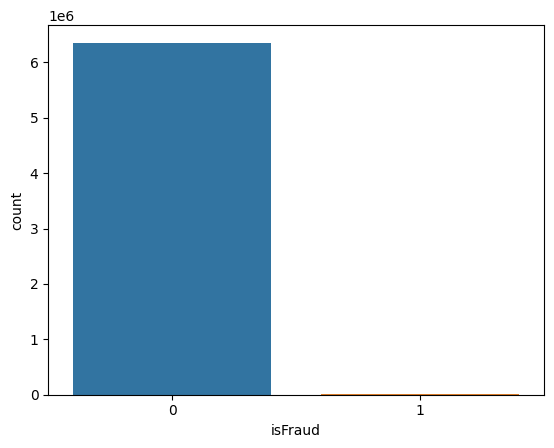

In [11]:
sns.countplot(df, x=df['isFraud'])

In [12]:
df.amount.min(), df.amount.max()

(0.0, 92445516.64)

# Analyse exploratoire des données

## Investiguons isFlaggedFraud

In [13]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [14]:
df[df['isFlaggedFraud'] == 1].amount.min(), df[df['isFlaggedFraud'] == 1].amount.max()

(353874.22, 10000000.0)

In [15]:
df[df['isFlaggedFraud'] == 0].amount.min(), df[df['isFlaggedFraud'] == 0].amount.max()

(0.0, 92445516.64)

## Type de transactions

In [16]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

Deux types de clients:
* clients normaux
* marchands

<Axes: xlabel='type', ylabel='count'>

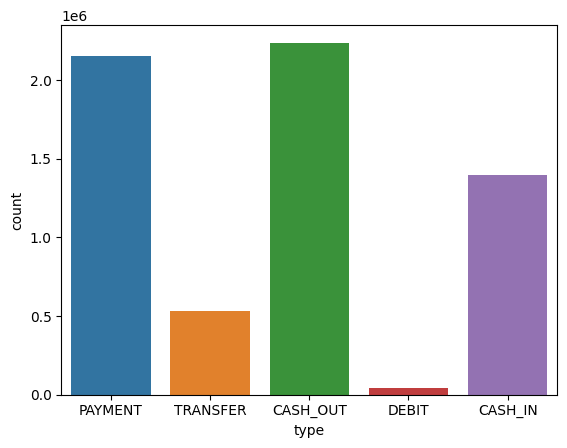

In [17]:
sns.countplot(df, x=df['type'])

In [18]:
df.groupby(['type', 'isFraud']).size()

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
dtype: int64

In [19]:
data = df[df['type'].isin(['CASH_OUT', 'TRANSFER'])].reset_index(drop=True)

In [20]:
len(df), len(data)

(6362620, 2770409)

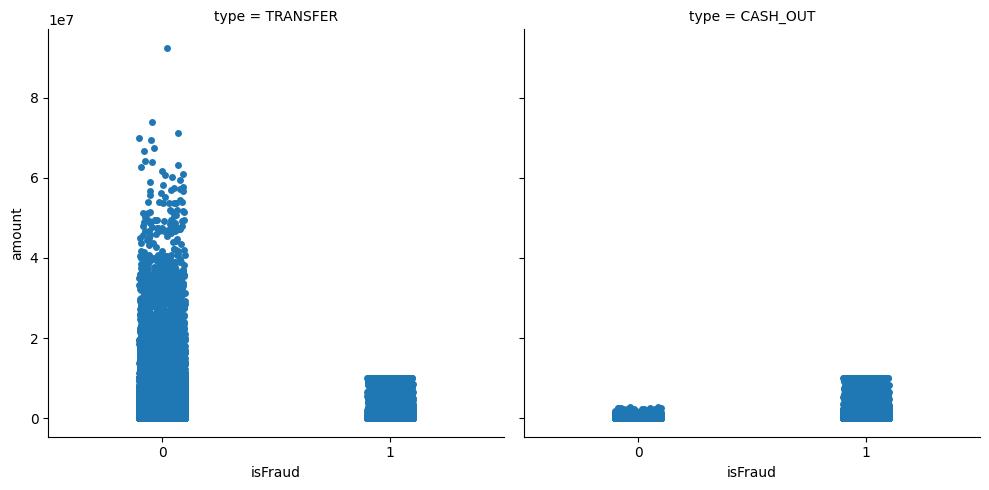

In [21]:
sns.catplot(data=data, x='isFraud', y='amount', col='type')
plt.show()

## Marchands

In [22]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [23]:
data[data['nameDest'].str.startswith('M')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [24]:
data[data['nameOrig'].str.startswith('M')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


## FRaud = transfert + cashout ?

In [25]:
fraud = data[data["isFraud"] == 1]

In [26]:
fraud[fraud['type'] == 'TRANSFER'].nameDest.isin(fraud[fraud['type'] == 'CASH_OUT'].nameOrig).any()

False

In [27]:
data.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
829259,164,CASH_OUT,114026.02,C1550597759,12116.72,0.00,C550792787,863416.18,977442.20,0,0
659056,143,CASH_OUT,108923.15,C2085304507,0.00,0.00,C1019833875,1176876.03,1285799.18,0,0
2099839,346,CASH_OUT,259692.13,C1272763710,0.00,0.00,C2069245539,14062140.84,13784069.35,0,0
1526904,258,CASH_OUT,10801.68,C1876039294,0.00,0.00,C1215615673,1567745.65,1578547.33,0,0
758189,160,CASH_OUT,160035.50,C743858866,166719.32,6683.82,C1513824064,1088382.46,1248417.96,0,0


In [28]:
data['type'].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

## Initiateur n'a pas d'argent

In [29]:
data[data['oldbalanceOrg'] == 0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
7,1,CASH_OUT,5346.89,C512549200,0.0,0.0,C248609774,652637.00,6453430.91,0,0
15,1,TRANSFER,77957.68,C207471778,0.0,0.0,C1761291320,94900.00,22233.65,0,0
16,1,TRANSFER,17231.46,C1243171897,0.0,0.0,C783286238,24672.00,0.00,0,0
17,1,TRANSFER,78766.03,C1376151044,0.0,0.0,C1749186397,103772.00,277515.05,0,0
18,1,TRANSFER,224606.64,C873175411,0.0,0.0,C766572210,354678.92,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2767291,709,CASH_OUT,244966.80,C2092646234,0.0,0.0,C211766342,5254563.09,5499529.89,0,0
2767292,709,CASH_OUT,123403.11,C1054278487,0.0,0.0,C1948756721,606875.62,730278.74,0,0
2770250,730,CASH_OUT,0.00,C729003789,0.0,0.0,C1388096959,1008609.53,1008609.53,1,0
2770252,730,CASH_OUT,0.00,C2088151490,0.0,0.0,C1156763710,0.00,0.00,1,0


In [30]:
data[data['oldbalanceOrg'] == 0].isFraud.value_counts()

isFraud
0    1308541
1         41
Name: count, dtype: int64

In [31]:
data['oldbalanceOrgMissing'] = (data['oldbalanceOrg'] == 0)

In [32]:
data[data['newbalanceDest'] == 0].isFraud.value_counts()

isFraud
0    12508
1     4091
Name: count, dtype: int64

In [33]:
data['newbalanceDestMissing'] = (data['newbalanceDest'] == 0)

## Verifions

In [34]:
data['newbalanceOrig'] = data['oldbalanceOrg'] - data['amount']
data['newbalanceDest'] = data['oldbalanceDest'] + data['amount']

In [35]:
data['errorOrig'] = data['newbalanceOrig'] - (data['oldbalanceOrg'] - data['amount'])
data['errorDest'] = data['newbalanceDest'] - (data['oldbalanceDest'] + data['amount'])

In [36]:
data[['errorOrig', 'errorDest']].describe()

,errorOrig,errorDest
count,2770409.0,2770409.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [37]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,oldbalanceOrgMissing,newbalanceDestMissing,errorOrig,errorDest
0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,181.00,1,0,False,True,0.0,0.0
1,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,21363.00,1,0,False,True,0.0,0.0
2,1,CASH_OUT,229133.94,C905080434,15325.0,-213808.94,C476402209,5083.0,234216.94,0,0,False,False,0.0,0.0
3,1,TRANSFER,215310.30,C1670993182,705.0,-214605.30,C1100439041,22425.0,237735.30,0,0,False,True,0.0,0.0
4,1,TRANSFER,311685.89,C1984094095,10835.0,-300850.89,C932583850,6267.0,317952.89,0,0,False,False,0.0,0.0


## Matrice de correlation

<Axes: >

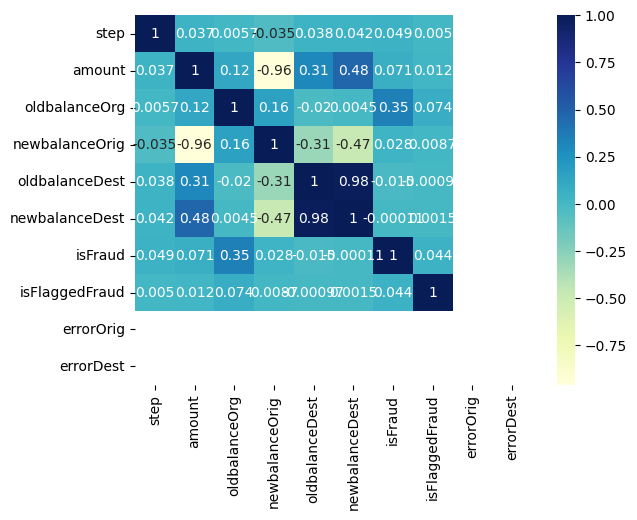

In [38]:
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')

<Axes: >

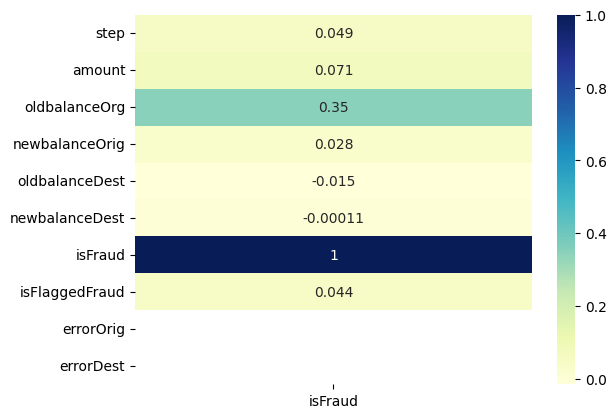

In [39]:
sns.heatmap(corr[['isFraud']], annot=True, cmap='YlGnBu')

# Modeling

In [40]:
X = data.drop(['step', 'nameOrig', 'nameDest', 'isFlaggedFraud', 'isFraud'], axis=1)
y = data['isFraud']

In [41]:
X.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'oldbalanceOrgMissing', 'newbalanceDestMissing',
       'errorOrig', 'errorDest'],
      dtype='object')

In [42]:
X['type'] = X['type'].map({'TRANSFER': 0, 'CASH_OUT': 1})

In [43]:
X['type'].value_counts()

type
1    2237500
0     532909
Name: count, dtype: int64

## Traintest split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [46]:
y_train.value_counts()/ len(y_train)

isFraud
0    0.997036
1    0.002964
Name: count, dtype: float64

In [47]:
y_test.value_counts()/ len(y_test)

isFraud
0    0.997035
1    0.002965
Name: count, dtype: float64

## Gradient Boosting Machine

In [48]:
import xgboost as xgb

In [49]:
clf = xgb.XGBClassifier(max_depth=3, n_jobs=-1)

In [50]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [51]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

In [52]:
y_pred = clf.predict(X_test)

In [53]:
precision_score(y_pred, y_test)

0.9963481436396835

In [54]:
recall_score(y_pred, y_test)

1.0

In [55]:
f1_score(y_pred, y_test)

0.9981707317073171

In [56]:
confusion_matrix(y_pred, y_test)

array([[552439,      6],
       [     0,   1637]], dtype=int64)

## Pickling The Model file For Deployment

In [57]:
import pickle
#pickle.dump(scaler,open('scaling.pkl','wb'))
pickle.dump(clf,open('XGmodel.pkl','wb'))